In [2]:
import sys
sys.path.insert(1, '../utils/')
import datacube
from utils.deafrica_datahandling import load_ard
from utils.deafrica_plotting import rgb
from odc.ui import with_ui_cbk

In [3]:
dc = datacube.Datacube(app='Sentinel-2')

In [4]:
# List Sentinel-2 products available in DE Africa
dc_products = dc.list_products()
display_columns = ['name', 'description']
dc_products[dc_products.name.str.contains(
    's2_l2a').fillna(
        False)][display_columns].set_index('name')

,description
name,
s2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed..."


In [5]:
dc_measurements = dc.list_measurements()
dc_measurements.loc['s2_l2a']

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
B01,B01,uint16,1,0,"[band_01, coastal_aerosol]",NaN
B02,B02,uint16,1,0,"[band_02, blue]",NaN
B03,B03,uint16,1,0,"[band_03, green]",NaN
B04,B04,uint16,1,0,"[band_04, red]",NaN
B05,B05,uint16,1,0,"[band_05, red_edge_1]",NaN
B06,B06,uint16,1,0,"[band_06, red_edge_2]",NaN
B07,B07,uint16,1,0,"[band_07, red_edge_3]",NaN
B08,B08,uint16,1,0,"[band_08, nir, nir_1]",NaN
B8A,B8A,uint16,1,0,"[band_8a, nir_narrow, nir_2]",NaN


In [7]:
# load data
ds = dc.load(product="s2_l2a",
             measurements=['red', 'green', 'blue', 'SCL'],
             y=(42.86, 42.81),
             x=(-2.6, -2.5),
             time=("2022-01-01", "2022-01-31"),
             resolution=(-10, 10),
             output_crs='EPSG:6933',
             group_by="solar_day",
            progress_cbk=with_ui_cbk())

print(ds)

<xarray.Dataset>
Dimensions:      (time: 13, x: 966, y: 472)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T11:19:11 ... 2022-01-31T11:...
  * y            (y) float64 4.982e+06 4.982e+06 ... 4.978e+06 4.978e+06
  * x            (x) float64 -2.509e+05 -2.509e+05 ... -2.412e+05 -2.412e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 722 649 650 1488 ... 5716 5732 5764 5712
    green        (time, y, x) uint16 647 571 719 1140 ... 5916 5992 6004 5940
    blue         (time, y, x) uint16 458 329 541 885 ... 6428 6412 6384 6412
    SCL          (time, y, x) uint8 2 5 5 5 5 5 5 5 5 5 ... 9 9 9 9 9 9 9 9 9 9
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


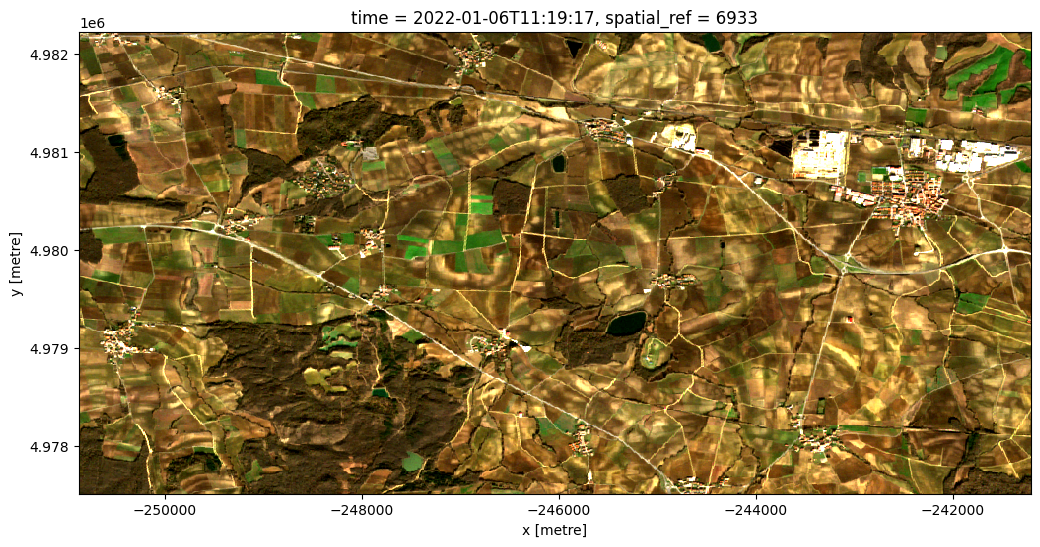

In [9]:
rgb(ds, index = [2])

In [ ]:
ds = load_ard(dc=dc,
              products=["s2_l2a"],
              measurements=['red', 'green', 'blue'],
             y=(42.86, 42.81),
             x=(-2.6, -2.5),
             time=("2022-01-01", "2022-01-31"),
              resolution=(-10, 10),
              output_crs='EPSG:6933',
              group_by="solar_day",
              dtype='native',
              progress_cbk=with_ui_cbk())

print(ds)

In [ ]:
rgb(ds, index=[7])

In [ ]:
ds = load_ard(dc=dc,
              products=["s2_l2a"],
              measurements=['red', 'green', 'blue'],
             y=(42, 41.5),
             x=(-5.5, -5),
             time=("2022-01-01", "2022-01-31"),
              resolution=(-20, 20),
              output_crs='EPSG:6933',
              group_by="solar_day",
              min_gooddata=0.98,
              progress_cbk=with_ui_cbk())

print(ds)

In [ ]:
rgb(ds, index=[1])